# Project 5: Ford GoBike System Data

## by Vaibhav Khobragade

## Preliminary Wrangling


#### Brief Introduction:
> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

> Bay Wheels offers affordable, accessible, and fun transportation option for everyone. Bay Area residents who qualify for CalFresh, SFMTA Lifeline Pass, or PG&E CARE utility discount are eligible to join our Bike Share for All program for 5 dollar for the first year — now accepting prepaid cards! Bike Share for All is available to Bay Area residents ages 18 and older. Membership includes the first 60 minutes of each trip. Rides longer than 60 minutes are 2 dollar for each additional 15 minutes. We offer all residents of the Bay Area an affordable, accessible, and fun new transportation option. Low-income residents qualify for a discounted membership.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import IFrame
from glob import glob
from geopy.geocoders import Nominatim
from geopy.point import Point
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

### 1. Combine CSV files

In [16]:
# stock_files = sorted(glob('data/fordgobike_tripdata_*.csv'))
# stock_files

['data\\fordgobike_tripdata_1.csv',
 'data\\fordgobike_tripdata_10.csv',
 'data\\fordgobike_tripdata_11.csv',
 'data\\fordgobike_tripdata_12.csv',
 'data\\fordgobike_tripdata_13.csv',
 'data\\fordgobike_tripdata_2.csv',
 'data\\fordgobike_tripdata_3.csv',
 'data\\fordgobike_tripdata_4.csv',
 'data\\fordgobike_tripdata_5.csv',
 'data\\fordgobike_tripdata_6.csv',
 'data\\fordgobike_tripdata_7.csv',
 'data\\fordgobike_tripdata_8.csv',
 'data\\fordgobike_tripdata_9.csv']

In [19]:
# ford_bikes = pd.concat((pd.read_csv(file).assign(filename = file)
#           for file in stock_files), ignore_index = True)

In [ ]:
# ford_bikes.drop('filename', axis = 1, inplace = True)

In [32]:
# ford_bikes.to_csv('ford_bikes_data.csv', index=False)

### 2. Reading CSV file

In [2]:
go_bikes = pd.read_csv('ford_bikes_data.csv')

c:\users\fubuki\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(go_bikes.shape)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)
go_bikes.head()

(2383421, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde St),37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN


### 3. Wrangling Start

In [4]:
go_bikes.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
738373,369,2018-10-26 14:58:04.6410,2018-10-26 15:04:14.0230,284.0,Yerba Buena Center for the Arts (Howard St at 3rd St),37.784872,-122.400876,343.0,Bryant St at 2nd St,37.783172,-122.393572,1114,Subscriber,No
335496,607,2017-09-18 14:33:30.7850,2017-09-18 14:43:38.1450,48.0,2nd St at S Park St,37.782411,-122.392706,102.0,Irwin St at 8th St,37.766883,-122.399579,1506,Subscriber,NaN
1930740,1360,2018-06-11 08:02:39.0030,2018-06-11 08:25:19.9240,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,350.0,8th St at Brannan St,37.771431,-122.405787,779,Subscriber,No
1064373,397,2018-12-23 10:16:57.1350,2018-12-23 10:23:34.2840,201.0,10th St at Fallon St,37.797673,-122.262997,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,5144,Subscriber,No
358667,268,2017-09-11 16:17:07.7690,2017-09-11 16:21:36.7080,195.0,Bay Pl at Vernon St,37.812314,-122.260779,181.0,Grand Ave at Webster St,37.811377,-122.265192,1892,Subscriber,NaN


In [5]:
go_bikes.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2383421 non-null  int64  
 1   start_time               2383421 non-null  object 
 2   end_time                 2383421 non-null  object 
 3   start_station_id         2371650 non-null  float64
 4   start_station_name       2371650 non-null  object 
 5   start_station_latitude   2383421 non-null  float64
 6   start_station_longitude  2383421 non-null  float64
 7   end_station_id           2371650 non-null  float64
 8   end_station_name         2371650 non-null  object 
 9   end_station_latitude     2383421 non-null  float64
 10  end_station_longitude    2383421 non-null  float64
 11  bike_id                  2383421 non-null  int64  
 12  user_type                2383421 non-null  object 
 13  bike_share_for_all_trip  1863721 non-null 

#### Qualites issues found in this dataset

In [6]:
go_bikes.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
bike_share_for_all_trip    519700
dtype: int64

In [7]:
# Let's clean all those null values from the dataset
go_bikes = go_bikes.dropna()

In [8]:
# Let's quick sanity check
go_bikes.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id           False
start_station_name         False
start_station_latitude     False
start_station_longitude    False
end_station_id             False
end_station_name           False
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
bike_share_for_all_trip    False
dtype: bool

In [9]:
# Duplicate check if any
go_bikes.duplicated().sum()

0

In [10]:
go_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 519700 to 2383420
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
dtypes: float64(6), int64(2), object(6)
memory usage: 211.9+ MB


#### Converting the appropirate datatypes for the analysis:
> `start_time` and `end_time`should be **datetime** format

> `start_station_id` and `end_station_id` should be **int64** format

> `user_type` and `bike_share_for_all_trip` should be **category** format

In [11]:
# Converting datetime format
go_bikes['start_time'] = pd.to_datetime(go_bikes['start_time'])
go_bikes['end_time'] = pd.to_datetime(go_bikes['end_time'])

> Also, we goona add few additional columns extract from **`start_time`** for the analysis
> **`year`, `month`, `days`,** and **`hours`**

Nice [article](https://www.dataquest.io/blog/python-datetime-tutorial/#:~:text=We%20can%20easily%20get%20year,that%20includes%20the%20full%20date.) for getting **`year, month, days, hours, sec` and `weekday`**

In [12]:
# Creating month, day, and hours
go_bikes['month'] = go_bikes['start_time'].dt.month.astype('category')
go_bikes['day'] = go_bikes['start_time'].dt.dayofweek.astype('category')
go_bikes['hour'] = go_bikes['start_time'].dt.hour

In [13]:
# Coverting into boolean dtypes
go_bikes.bike_share_for_all_trip.replace({'Yes':True, 'No':False}, inplace=True)

In [14]:
# Converting datatype
go_bikes['user_type'] = go_bikes['user_type'].astype('category')
go_bikes['start_station_id'] = go_bikes['start_station_id'].astype('int64')
go_bikes['end_station_id'] = go_bikes['end_station_id'].astype('int64')

In [15]:
# Quick sanity check
go_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851950 entries, 519700 to 2383420
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         int64         
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           int64         
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  bike_share_for_all_trip  bool          
 14  month                    category      
 15  day                      category      
 16  hour                     int64         
dtypes: bool(1), category(3

In [16]:
go_bikes.day.value_counts()

1    317540
2    314495
3    312258
0    292878
4    288746
5    174140
6    151893
Name: day, dtype: int64

#### Replacing the multiple value [discussion](https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column)

In [17]:
# Replacing numbers with labels are appropriate
go_bikes = go_bikes.replace({'day' : { 0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thuesday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' }})
go_bikes = go_bikes.replace({'month' : { 1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}})

In [18]:
go_bikes.day = go_bikes.day.astype('category')

In [19]:
go_bikes.end_station_latitude.value_counts()

37.776639    50000
37.795392    44113
37.776598    42970
37.804770    39222
37.789625    35955
             ...  
37.784855       25
37.729279       24
37.263310       15
37.778058       12
37.347721        4
Name: end_station_latitude, Length: 351, dtype: int64

In [20]:
go_bikes.end_station_longitude.value_counts()

-122.395526    50000
-122.394203    44113
-122.395282    42970
-122.403234    39222
-122.400811    35955
               ...  
-122.239305       25
-122.392896       24
-121.833332       15
-122.225400       12
-121.890856        4
Name: end_station_longitude, Length: 351, dtype: int64

> Here I noticed one thing we can grab hidder variable for our datasets. Look at carefully latitute and logitute of the particular place that mention in the **[fordbike](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all)**  when bike rider go to the one city to other. Also, there are alluded areas permit the bike rider to go. I see on the official [webistes](https://www.lyft.com/bikes/bay-wheels) bikes available **`24/7/365 in San Francisco, Oakland, Berkeley, Emeryville, and San Jose`**. So we can guess these cities we can get from **`start_station_latitude, start_station_longitude, end_station_longitude, end_station_longitude`**.

#### Getting the cities label

In [21]:
geolocator = Nominatim(user_agent="geoapiExercises")
def city_state_country(lat, lang):
    location = geolocator.reverse(Point(lat, lang))
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    return [city, state, country]

In [22]:
lat_log_list = []

In [23]:
# Let 3 minutes to run this code and make sure complete this code fist before start another cells.
# Because of humungeous record it takes time.

for i, j in zip(go_bikes['start_station_latitude'].value_counts().index, go_bikes['start_station_longitude'].value_counts().index):
    lat, lang = i, j
    lat_log_list.append(city_state_country(lat, lang)[0])

In [24]:
# Chekc the unique in the list
mylist = list(set(lat_log_list))
mylist

['', 'San Francisco', 'Oakland', 'Berkeley', 'San Jose']

> As you can see one of the empty because it may currently change in the location of `latitude and logitude`. Now we have to map wisely those name  with those `latitude and logitude`. 

### Start city name:
> Bike rider start from one city to another through ford go bikes

In [25]:
# lenght of list
len(lat_log_list)

351

In [26]:
start_city = go_bikes.start_station_latitude.value_counts().reset_index()
start_city.rename({'index': 'start_station_latitude', 'start_station_latitude': 'count'}, axis = 1, inplace = True)

In [27]:
start_city['city'] = lat_log_list
start_city

,start_station_latitude,count,city
0,37.795392,38461,San Francisco
1,37.776639,37617,San Francisco
2,37.776598,35092,San Francisco
3,37.776619,34918,San Francisco
4,37.775880,33716,San Francisco
...,...,...,...
346,37.784855,20,Oakland
347,37.729279,17,San Francisco
348,37.778058,14,Oakland
349,37.782411,11,San Francisco


In [28]:
# We are extracting every appropriate lattitude and logitude from above start city
san_frans = start_city[start_city['city'] == 'San Francisco']['start_station_latitude'].to_list()
berkeley = start_city[start_city['city'] == 'Berkeley']['start_station_latitude'].to_list()
san_jose = start_city[start_city['city'] == 'San Jose']['start_station_latitude'].to_list()
oakland = start_city[start_city['city'] == 'Oakland']['start_station_latitude'].to_list()

In [29]:
# Quick sanity check
print('Length of San Francisco: ', len(san_frans))
print('Length of Berkeley: ', len(berkeley))
print('Length of San Jose: ', len(san_jose))
print('Length of Oakland: ', len(oakland))

Length of San Francisco:  158
Length of Berkeley:  44
Length of San Jose:  50
Length of Oakland:  83


Very Important discussion on the [stack overflow](https://stackoverflow.com/questions/46113078/pandas-add-value-at-specific-iloc-into-new-dataframe-column). We map the cities name through simulatenously we add the extra column as `city_name`

In [30]:
# df.loc[df.index[someRowNumber], 'New Column Title'] = "some value"
city_row1 = go_bikes[go_bikes.start_station_latitude.isin(san_frans)].index
city_row2 = go_bikes[go_bikes.start_station_latitude.isin(berkeley)].index
city_row3 = go_bikes[go_bikes.start_station_latitude.isin(san_jose)].index
city_row4 = go_bikes[go_bikes.start_station_latitude.isin(oakland)].index

In [31]:
# Creating new column and map appropirate label with the help latitude and logitude
go_bikes.loc[city_row1, 'start_city'] = 'San Francisco'
go_bikes.loc[city_row2, 'start_city'] = 'Berkeley'
go_bikes.loc[city_row3, 'start_city'] = 'San Jose'
go_bikes.loc[city_row4, 'start_city'] = 'Oakland'

In [32]:
go_bikes

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,hour,start_city
519700,76491,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,120,Mission Dolores Park,37.761420,-122.426435,26,1st St at Folsom St,37.787290,-122.394380,903,Customer,False,September,Sunday,18,San Francisco
519702,74498,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,55,Webster St at Grove St,37.777053,-122.429558,55,Webster St at Grove St,37.777053,-122.429558,2696,Customer,False,September,Sunday,11,San Francisco
519703,79396,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,11,Davis St at Jackson St,37.797280,-122.398436,55,Webster St at Grove St,37.777053,-122.429558,2458,Customer,False,September,Sunday,10,San Francisco
519704,60287,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,2497,Customer,False,September,Sunday,15,San Francisco
519705,70755,2018-09-30 12:26:06.671,2018-10-01 08:05:22.595,188,Dover St at 57th St,37.842630,-122.267738,190,West St at 40th St,37.830223,-122.270950,1483,Customer,False,September,Sunday,12,Berkeley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383416,631,2018-08-01 00:04:38.221,2018-08-01 00:15:10.131,247,Fulton St at Bancroft Way,37.867789,-122.265896,252,Channing Way at Shattuck Ave,37.865847,-122.267443,1551,Subscriber,True,August,Wednesday,0,Berkeley
2383417,325,2018-08-01 00:07:56.039,2018-08-01 00:13:21.142,100,Bryant St at 15th St,37.767100,-122.410662,122,19th St at Mission St,37.760299,-122.418892,332,Subscriber,False,August,Wednesday,0,San Francisco
2383418,678,2018-08-01 00:00:01.659,2018-08-01 00:11:20.165,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,56,Koshland Park,37.773414,-122.427317,3648,Customer,False,August,Wednesday,0,San Francisco
2383419,405,2018-08-01 00:01:26.995,2018-08-01 00:08:12.204,100,Bryant St at 15th St,37.767100,-122.410662,97,14th St at Mission St,37.768265,-122.420110,68,Subscriber,False,August,Wednesday,0,San Francisco


In [33]:
lat_log_list_end = []

In [34]:
for i, j in zip(go_bikes['end_station_latitude'].value_counts().index, go_bikes['end_station_longitude'].value_counts().index):
    lat, lang = i, j
    lat_log_list_end.append(city_state_country(lat, lang)[0])

In [35]:
# Unique in the list
mylist_2 = list(set(lat_log_list_end))
mylist_2

['', 'San Francisco', 'Oakland', 'Berkeley', 'San Jose']

In [36]:
# Same as above first list. It's perfect
len(lat_log_list_end)

351

In [37]:
end_city = go_bikes.end_station_latitude.value_counts().reset_index()
end_city.rename({'index': 'end_station_latitude', 'end_station_latitude': 'count'}, axis = 1, inplace = True)

In [38]:
end_city['city'] = lat_log_list_end
end_city

,end_station_latitude,count,city
0,37.776639,50000,San Francisco
1,37.795392,44113,San Francisco
2,37.776598,42970,San Francisco
3,37.804770,39222,San Francisco
4,37.789625,35955,San Francisco
...,...,...,...
346,37.784855,25,Oakland
347,37.729279,24,San Francisco
348,37.263310,15,San Jose
349,37.778058,12,Oakland


In [39]:
san_frans = end_city[end_city['city'] == 'San Francisco']['end_station_latitude'].to_list()
berkeley = end_city[end_city['city'] == 'Berkeley']['end_station_latitude'].to_list()
san_jose = end_city[end_city['city'] == 'San Jose']['end_station_latitude'].to_list()
oakland = end_city[end_city['city'] == 'Oakland']['end_station_latitude'].to_list()

In [40]:
print('Length of San Francisco: ', len(san_frans))
print('Length of Berkeley: ', len(berkeley))
print('Length of San Jose: ', len(san_jose))
print('Length of Oakland: ', len(oakland))

Length of San Francisco:  159
Length of Berkeley:  44
Length of San Jose:  51
Length of Oakland:  82


In [41]:
# df.loc[df.index[someRowNumber], 'New Column Title'] = "some value"
city_row1 = go_bikes[go_bikes.end_station_latitude.isin(san_frans)].index
city_row2 = go_bikes[go_bikes.end_station_latitude.isin(berkeley)].index
city_row3 = go_bikes[go_bikes.end_station_latitude.isin(san_jose)].index
city_row4 = go_bikes[go_bikes.end_station_latitude.isin(oakland)].index

In [42]:
# Creating new column and map appropirate label with the help latitude and logitude
go_bikes.loc[city_row1, 'end_city'] = 'San Francisco'
go_bikes.loc[city_row2, 'end_city'] = 'Berkeley'
go_bikes.loc[city_row3, 'end_city'] = 'San Jose'
go_bikes.loc[city_row4, 'end_city'] = 'Oakland'

In [43]:
go_bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,hour,start_city,end_city
519700,76491,2018-09-30 18:37:01.771,2018-10-01 15:51:53.553,120,Mission Dolores Park,37.761420,-122.426435,26,1st St at Folsom St,37.787290,-122.394380,903,Customer,False,September,Sunday,18,San Francisco,San Francisco
519702,74498,2018-09-30 11:34:44.797,2018-10-01 08:16:23.357,55,Webster St at Grove St,37.777053,-122.429558,55,Webster St at Grove St,37.777053,-122.429558,2696,Customer,False,September,Sunday,11,San Francisco,San Francisco
519703,79396,2018-09-30 10:12:49.940,2018-10-01 08:16:06.044,11,Davis St at Jackson St,37.797280,-122.398436,55,Webster St at Grove St,37.777053,-122.429558,2458,Customer,False,September,Sunday,10,San Francisco,San Francisco
519704,60287,2018-09-30 15:28:03.556,2018-10-01 08:12:50.787,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,2497,Customer,False,September,Sunday,15,San Francisco,San Francisco
519705,70755,2018-09-30 12:26:06.671,2018-10-01 08:05:22.595,188,Dover St at 57th St,37.842630,-122.267738,190,West St at 40th St,37.830223,-122.270950,1483,Customer,False,September,Sunday,12,Berkeley,Oakland


> One thing notice, we have blank label that we wanted to drop for further analysis

In [44]:
go_bikes.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
month                          0
day                            0
hour                           0
start_city                 18462
end_city                   20735
dtype: int64

In [45]:
go_bikes = go_bikes.dropna()

In [46]:
go_bikes.shape

(1818202, 19)

In [47]:
# Quick sanity check
go_bikes.isnull().sum().any()

False

In [48]:
go_bikes.start_city = go_bikes.start_city.astype('category')
go_bikes.end_city = go_bikes.end_city.astype('category')

c:\users\fubuki\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [49]:
go_bikes.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
bike_share_for_all_trip              bool
month                              object
day                              category
hour                                int64
start_city                       category
end_city                         category
dtype: object

In [50]:
go_bikes.reset_index(drop = True, inplace = True)

### What is the structure of your dataset?

> 1818202 obeservation and 19 variable that help me get insight and achive the goal.

### What is/are the main feature(s) of interest in your dataset?

> 1. **`duration_sec`.**
2. **`start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude`.**
3. **`user_type`**
4. **`bike_share_for_all_trip`**
5. **`day`, `hours` and `month`**
6.  **`start_city` and `end_city`** 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. `duration_sec` that bike riding the duration
2. `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude` that explain the journey of the rider from one place to other
3. `user_type` as 'subscriber' and 'customer'.
4. `bike_share_for_all_trip` whether share or not. Also, people get discount if they have low income.
5. `day`, which day bike riding done the most and `hours` timing of riding the most. Even also the `month`
6. `start_city` of the lacation and `end_city` of the loacation of the bike.

# Visualization Model start

## 4. Univariate Exploration

### 4.1 Most Duration of Bikes

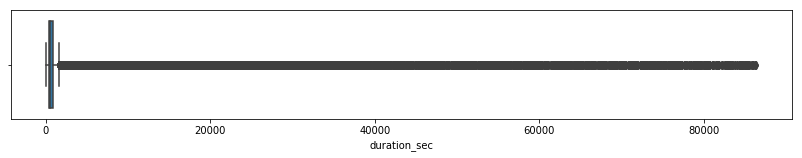

In [51]:
plt.figure(figsize=(14,2))
sb.boxplot(data = go_bikes, x = 'duration_sec');

> **Huge outlier** as you can see in box plot. It's not possible people get ride above sec. The ford go bike allow to the rides  Membership includes the first 60 minutes of each trip.

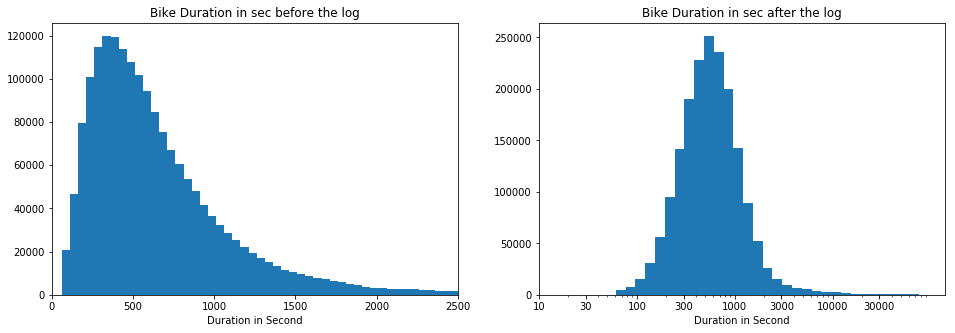

In [52]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
bin_edges = np.arange(go_bikes.duration_sec.min(), go_bikes.duration_sec.max()+50, 50);
plt.hist(data = go_bikes, x = 'duration_sec', bins = bin_edges);
# plt.xscale('log')
plt.xlabel('Duration in Second');
plt.xlim(0, 2500)
plt.title('Bike Duration in sec before the log')

plt.subplot(1,2,2)
bin_edges = 10 ** np.arange(np.log10(go_bikes.duration_sec.min()), np.log10(go_bikes.duration_sec.max())+0.1, 0.1);
plt.hist(data = go_bikes, x = 'duration_sec', bins = bin_edges);
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1000, 3000, 10000, 30000], [10, 30, 100, 300, 1000, 3000, 10000, 30000]);
plt.xlabel('Duration in Second');
plt.title('Bike Duration in sec after the log');

> Above both graph depict the ranges of the `duration_sec` that lie between **300 to 800** most. Some of them outlier might be some malfunction to count those ranges or may be they forget logout their session.   

### 4.2 User type

> **`Annotation` function created. We goona reuse this rest our analysis part. So it's better make function**

##### Annotation with percentage

In [53]:
def annotation_perc(ax, perc_list):
    i = 0
    for p in ax.patches:
        ax.annotate('{:.0f}\n{:.2f}%'.format(p.get_height(), perc_list[i]),
                   (p.get_x()+p.get_width()/2, p.get_height()),
                   color = 'black', va='bottom', ha='center', size=10)
        i+=1

##### Removing axis

In [54]:
def remove_axis():
    cur_axes = plt.gca()
    cur_axes.axes.get_yaxis().set_visible(False)
    sb.despine(fig, left = True)

###### Annotation only

In [55]:
def annotation(ax):
    i = 0
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x()+p.get_width()/2, p.get_height()),
                   color = 'black', va='bottom', ha='center', size=10)
        i+=1

In [56]:
# Making base color 
base_color = sb.color_palette()[0]

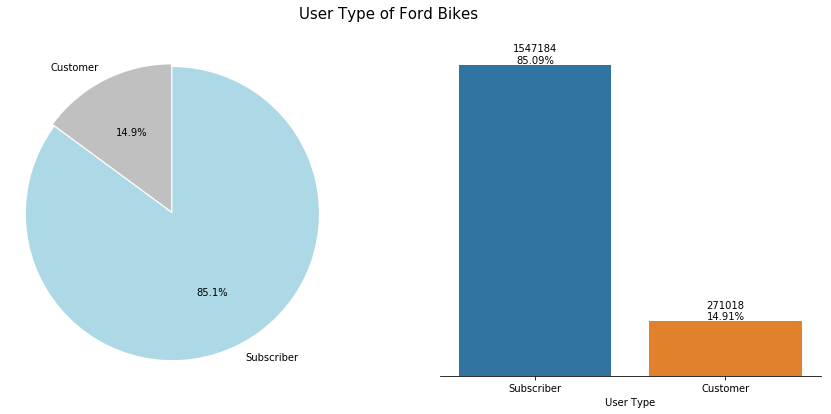

In [57]:
# Creating fig with size
fig = plt.figure(figsize=[15, 6])

# Subplot
plt.subplot(1,2,1)
user_label = go_bikes.user_type.value_counts().index
user_count = go_bikes.user_type.value_counts().to_list()
my_colors = ['lightblue', 'silver']
my_explode = [0.01, 0.01]
plt.pie(user_count, labels = user_label, startangle = 90, colors = my_colors, explode = my_explode, counterclock = False, autopct='%1.1f%%')
plt.axis('square');


perc_list = []
num_list = go_bikes.user_type.value_counts().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

plt.subplot(1,2,2)
ax = sb.countplot(data = go_bikes, x = 'user_type', order = user_label);
plt.xlabel('User Type')
plt.suptitle('User Type of Ford Bikes', fontsize = 15)

# calling function above we created ;)

# removing the axis
remove_axis()

# put the annotation at the top of the bar
annotation_perc(ax, perc_list)

> The **`subscriber`** user type has been larger with count **1547184(85.09%)** than **`non-subscriber`**. 

### 4.3 Bike sharing

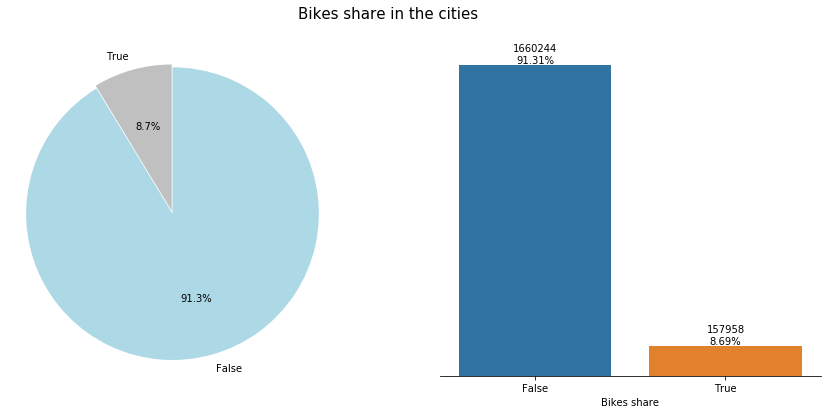

In [58]:
fig = plt.figure(figsize=[15, 6])
plt.subplot(1,2,1)
bike_share_label = go_bikes.bike_share_for_all_trip.value_counts().index
bike_share_count = go_bikes.bike_share_for_all_trip.value_counts().to_list()
my_colors = ['lightblue', 'silver']
my_explode = [0.01, 0.01]
plt.pie(bike_share_count, labels = bike_share_label, startangle = 90, colors = my_colors, explode = my_explode, counterclock = False, autopct='%1.1f%%')
plt.axis('square');


perc_list = []
num_list = go_bikes.bike_share_for_all_trip.value_counts().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

plt.subplot(1,2,2)
ax = sb.countplot(data = go_bikes, x = 'bike_share_for_all_trip', order = bike_share_label);
plt.xlabel('Bikes share')
plt.suptitle('Bikes share in the cities', fontsize = 15)

# Sublime custom with graph
# calling function above

# removing the axis
remove_axis()

# put the annotation at the top of the bar
annotation_perc(ax, perc_list)

> Bike sharing **`ratio`** is insinuating that bike sharing isn't commonly happen

### 4.4 Hours

In [59]:
go_bikes.hour.describe()

count    1.818202e+06
mean     1.350121e+01
std      4.744967e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.400000e+01
75%      1.700000e+01
max      2.300000e+01
Name: hour, dtype: float64

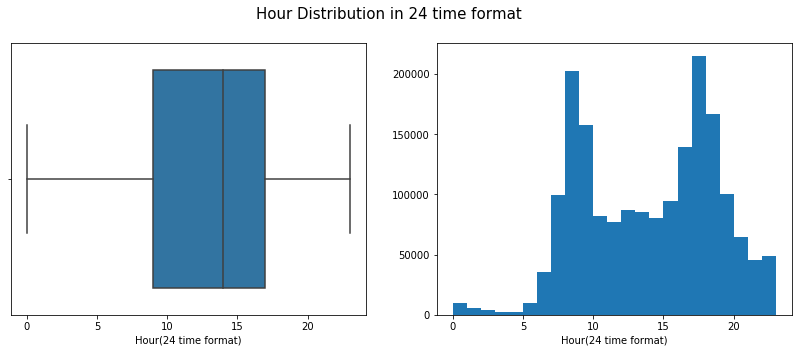

In [60]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sb.boxplot(data = go_bikes, x = 'hour');
plt.xlabel('Hour(24 time format)');

plt.subplot(1,2,2)
bin_width = 1
bin_edges = np.arange(go_bikes.hour.min(), go_bikes.hour.max()+bin_width, bin_width) 
plt.hist(data = go_bikes, x = 'hour', bins = bin_edges);
plt.xlabel('Hour(24 time format)');
plt.suptitle('Hour Distribution in 24 time format', fontsize = 15);

> Above histogram portray the bimodel. That means the most of the people rides at **`9 o'clock` morning** and ranges between `16 to 17o'clock` at the **evening**. Boxplot provide the median that we can see distribution of people riding hours start from 9 to 17. But the histogram are more precise for our result. 

### 4.5 Month

In [61]:
month_order = go_bikes.month.value_counts().index

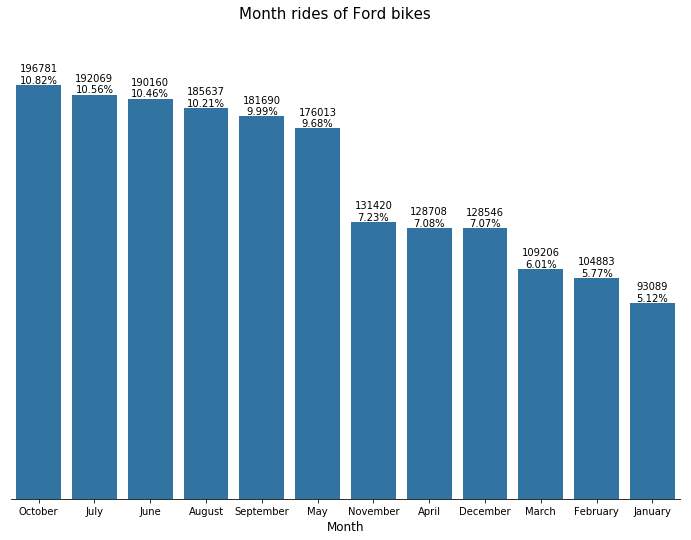

In [62]:
fig = plt.figure(figsize=[12, 8])
ax = sb.countplot(data = go_bikes, x = 'month', color = base_color, order = month_order);
plt.xlabel('Month', fontsize = 12)
plt.suptitle('Month rides of Ford bikes', fontsize = 15)

perc_list = []
num_list = go_bikes.month.value_counts().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

# Calling Function
remove_axis()

# Annotation
annotation_perc(ax, perc_list)

>**`Octomer month`** has been highest count and percentage with **196781(10.82%)** for bike riding in 2018 that followed by july, june, and august...etc. 

### 4.6 Day ride of the week

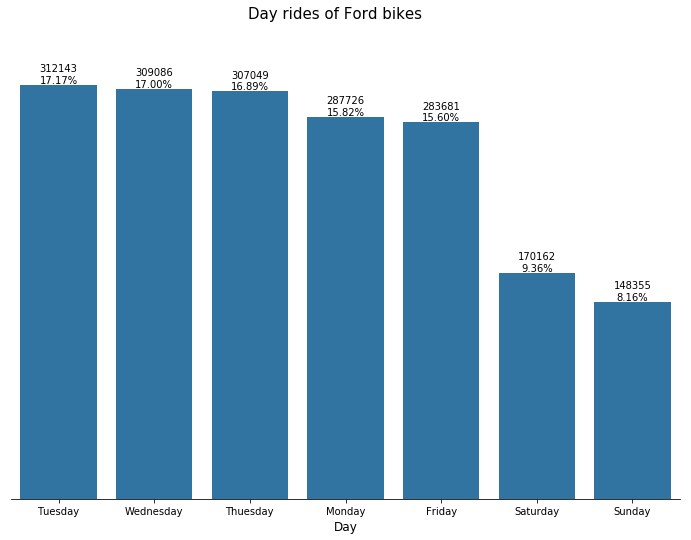

In [63]:
fig = plt.figure(figsize=[12, 8])
day_order = go_bikes.day.value_counts().index
ax = sb.countplot(data = go_bikes, x = 'day', color = base_color, order = day_order);
plt.xlabel('Day', fontsize = 12)
plt.suptitle('Day rides of Ford bikes', fontsize = 15)

perc_list = []
num_list = go_bikes.day.value_counts().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

# Calling Function
remove_axis()

# Annotation
annotation_perc(ax, perc_list)

> Above graph delineates, the people take rest on the **`weekend`**. There are no major differences in the weekday of bike riding. 

### 4.7 Start station name and End station name

In [64]:
go_bikes.start_station_name.value_counts().head()

San Francisco Ferry Building (Harry Bridges Plaza)           38461
San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
San Francisco Caltrain (Townsend St at 4th St)               35092
Market St at 10th St                                         34918
Berry St at 4th St                                           33716
Name: start_station_name, dtype: int64

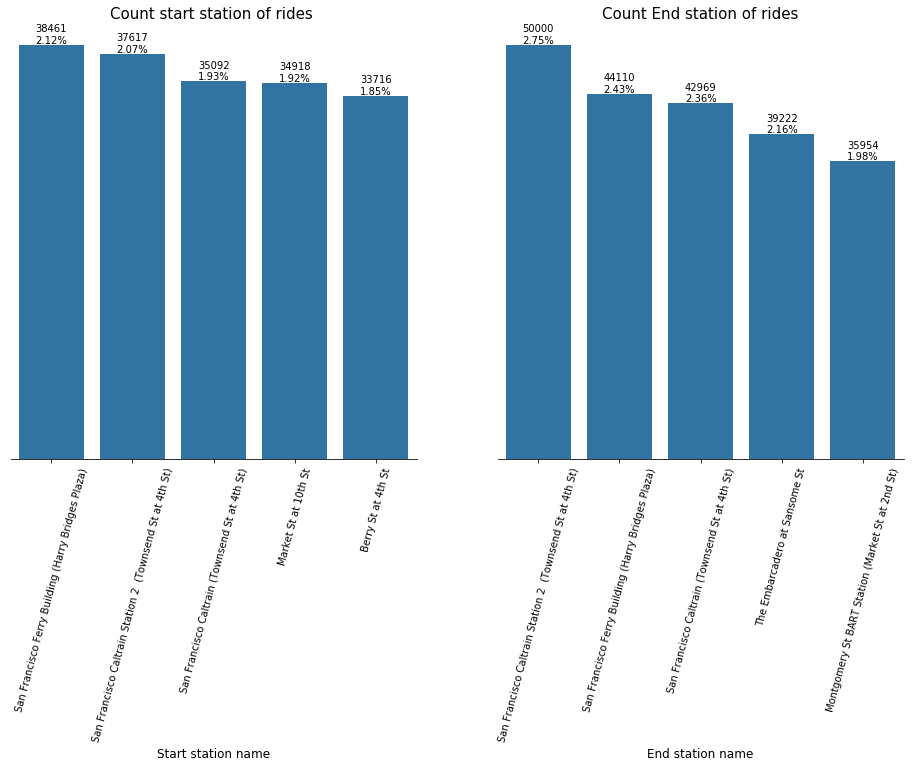

In [65]:
fig = plt.figure(figsize=[16, 8])
plt.subplot(1,2,1)
start_station_order = go_bikes.start_station_name.value_counts().head().index
ax1 = sb.countplot(data = go_bikes, x = 'start_station_name', color = base_color, order = start_station_order);
plt.xticks(rotation = 75)
plt.xlabel('Start station name', fontsize = 12)
plt.title('Count start station of rides ', fontsize = 15)

perc_list = []
num_list = go_bikes.start_station_name.value_counts().head().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

# Calling Function
remove_axis()

# Annotation
annotation_perc(ax1, perc_list)


plt.subplot(1,2,2)
end_station_order = go_bikes.end_station_name.value_counts().head().index
ax2 = sb.countplot(data = go_bikes, x = 'end_station_name', color = base_color, order = end_station_order);
plt.xticks(rotation = 75)
plt.xlabel('End station name', fontsize = 12)
plt.title('Count End station of rides', fontsize = 15)

perc_list = []
num_list = go_bikes.end_station_name.value_counts().head().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)
    
# Calling Function
remove_axis()

# Annotation
annotation_perc(ax2, perc_list)

> Top 5 station that people used to ride in the **`San Francisco`** city. People used ford go bike within San Francisco city or might be some people visit one city to another through the bike.

### 4.8 Distinct start city area to end city area:
> I want to search different city area where the people move from one city to another

In [66]:
diff_city = go_bikes[go_bikes['start_city'] != go_bikes['end_city']]

In [67]:
# https://www.datasciencemadesimple.com/get-unique-values-rows-dataframe-python-pandas/
diff_city = diff_city.drop_duplicates(subset = ["start_city", "end_city"])

In [68]:
# map
city_map = folium.Map(location = [37.795392, -122.394203], zoom_start = 11, control_scale = True)

# plot city location using apply
diff_city.apply(lambda row: folium.Marker(location = [row['start_station_latitude'], row['start_station_longitude']],
                                         popup = row['start_city'], 
                                         icon = folium.Icon(color = 'orange', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);

diff_city.apply(lambda row: folium.Marker(location = [row['end_station_latitude'], row['end_station_longitude']],
                                         popup = row['end_city'],
                                         icon = folium.Icon(color='green', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);

# add route to map

# diff_city.apply(lambda row: folium.PolyLine(locations=[[row['start_station_latitude'], row['start_station_longitude']], [row['end_station_latitude'], row['end_station_longitude']]], 
#                 color='blue', weight = 1.5, line_opacity = 0.1).add_to(city_map), axis = 1);

diff_city.apply(lambda row: plugins.AntPath(locations=[[row['start_station_latitude'], row['start_station_longitude']], [row['end_station_latitude'], row['end_station_longitude']]], 
                color='purple', weight = 1.5, line_opacity = 0.1).add_to(city_map), axis = 1);


# display the map
city_map



# city_map.save('citymap')

> People rides on bike from one city to another:

> 1. **`Orange`** ----> start city area for bike ride

> 2. **`Green`**  ----> destination area.

### 4.9 Start city and End city counts

In [69]:
go_bikes.end_city.value_counts()

San Francisco    1362466
Oakland           233499
Berkeley          136300
San Jose           85937
Name: end_city, dtype: int64

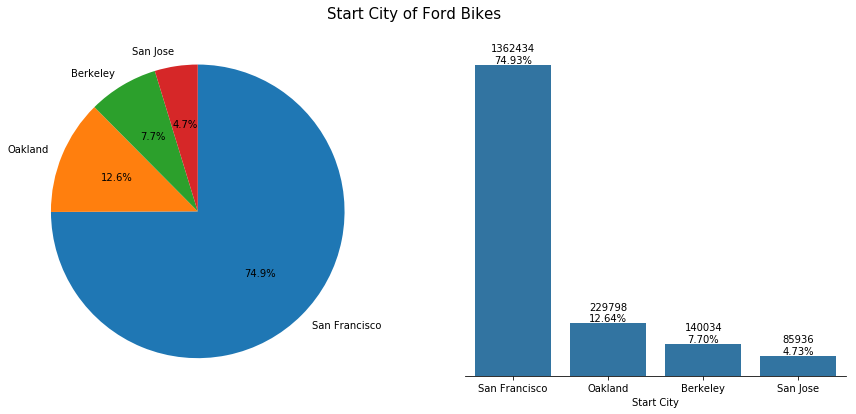

In [70]:
fig = plt.figure(figsize=[15, 6])
plt.subplot(1,2,1)
st_city_label = go_bikes.start_city.value_counts().index
st_city_count = go_bikes.start_city.value_counts().to_list()
 
plt.pie(st_city_count, labels = st_city_label, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis('square');


perc_list = []
num_list = go_bikes.start_city.value_counts().to_list()

for i in range(0, len(num_list)):
    percent = round(100*num_list[i]/go_bikes.shape[0], 2)
    perc_list.append(percent)

plt.subplot(1,2,2)
ax = sb.countplot(data = go_bikes, x = 'start_city', color = base_color, order = st_city_label);
plt.xlabel('Start City')
plt.suptitle('Start City of Ford Bikes', fontsize = 15)

# calling function above

# removing the axis
remove_axis()

# put the annotation at the top of the bar
annotation_perc(ax, perc_list)
###############################################################################################################################

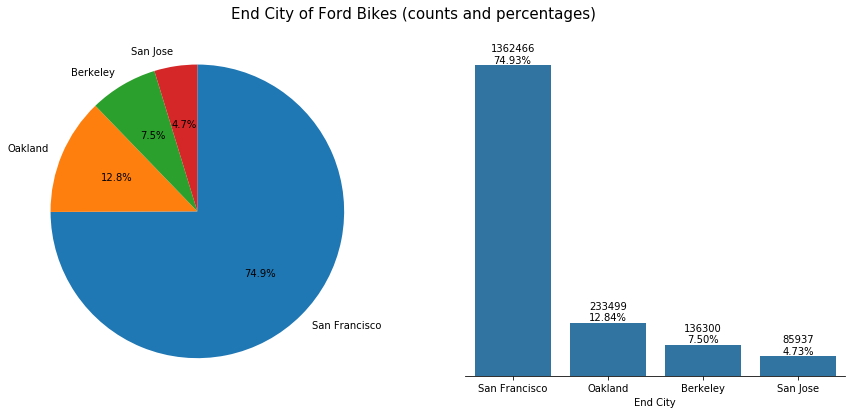

In [71]:
fig = plt.figure(figsize = [15, 6])
plt.subplot(1,2,1)
end_city_label = go_bikes.end_city.value_counts().index
end_city_count = go_bikes.end_city.value_counts().to_list()

plt.pie(end_city_count, labels = end_city_label, startangle = 90, counterclock = False, autopct='%1.1f%%')
plt.axis('square');


perc_list = []
num_list = go_bikes.end_city.value_counts().to_list()

for j in range(0, len(num_list)):
    percent = round(100*num_list[j]/go_bikes.shape[0], 2)
    perc_list.append(percent)

plt.subplot(1,2,2)
ax = sb.countplot(data = go_bikes, x = 'end_city', color = base_color, order = end_city_label);
plt.xlabel('End City')
plt.suptitle('End City of Ford Bikes (counts and percentages)', fontsize = 15)

# calling function above

# removing the axis
remove_axis()

# put the annotation at the top of the bar
annotation_perc(ax, perc_list)

> **`San Francosco`** city is the highest among to all for using the bike rides within city followed by Oakland, Berkeley, and San Jose. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 1.  **`duration_sec`** has outliers. In order to see to fix that we have done log transformation that shows similar gaussian distribution and xlim function to see wheere the most of data ranges lie.  
2. **`user_type`** countplot that show the subscriber has more than five times. Means, most of the bike rider has taken membership.
3. **`month`**, countplot show in which month bike riding at most in 2018 
4. **`year`** wise countplot that measure no. of crimes register in each year.
5. **`day`**  countplot depict the clearly in weekend people less likely interest in bike riding. 
6. **`start_station_name`** and **`end_station_name`** countplot. The San Franciso the most bike used and travel within city.
7. **`start_city and end_city`** area folium map shows distinct places where people gone one city to another. Afterwards, show the counts of all city in the counplot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After performing the log transformion on **`duration_sec`**, we adjust the log base bin sizes for nice clairty in the log transformation, then set appropriate labels. Selecting pertinent data ranges for removing the outlier to express clear data with **bell curve**.

> In the countplot, we used asthetic coding that where we used subplot to divide indivisual figure then we apply color and order endcoding. Then, we build the function of the `annotation()`, `remove_axes(), and annotation_perc()` that not just remove the axis, but also we provide annotation on the top of the bar with percentage. 

## 5 Bivariate Exploration

### 5.1 `Day with user type`

Making in the correct order [Decorous discussion](https://stackoverflow.com/questions/13838405/custom-sorting-in-pandas-dataframe) 

In [72]:
# df['m'] = pd.Categorical(df['m'], ["March", "April", "Dec"])
go_bikes['day'] = pd.Categorical(go_bikes['day'], ['Monday','Tuesday','Wednesday','Thuesday','Friday','Saturday','Sunday'])
go_bikes.sort_values('day')

c:\users\fubuki\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,hour,start_city,end_city
909100,451,2018-03-12 07:45:25.406,2018-03-12 07:52:56.598,129,Harrison St at 20th St,37.758862,-122.412544,108,16th St Mission BART,37.764710,-122.419957,1374,Subscriber,False,March,Monday,7,San Francisco,San Francisco
1287008,903,2018-06-25 17:48:34.687,2018-06-25 18:03:38.189,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,81,Berry St at 4th St,37.775880,-122.393170,3381,Subscriber,False,June,Monday,17,San Francisco,San Francisco
1287009,1508,2018-06-25 17:38:26.456,2018-06-25 18:03:35.049,6,The Embarcadero at Sansome St,37.804770,-122.403234,41,Golden Gate Ave at Polk St,37.781270,-122.418740,2594,Subscriber,False,June,Monday,17,San Francisco,San Francisco
1287010,678,2018-06-25 17:52:16.095,2018-06-25 18:03:34.753,16,Steuart St at Market St,37.794130,-122.394430,81,Berry St at 4th St,37.775880,-122.393170,1775,Subscriber,False,June,Monday,17,San Francisco,San Francisco
1287011,257,2018-06-25 17:59:10.170,2018-06-25 18:03:27.488,37,2nd St at Folsom St,37.785000,-122.395936,66,3rd St at Townsend St,37.778742,-122.392741,1605,Subscriber,False,June,Monday,17,San Francisco,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293124,267,2018-10-14 10:55:02.147,2018-10-14 10:59:29.717,97,14th St at Mission St,37.768265,-122.420110,122,19th St at Mission St,37.760299,-122.418892,935,Subscriber,False,October,Sunday,10,San Francisco,San Francisco
293123,804,2018-10-14 10:46:14.648,2018-10-14 10:59:38.922,146,30th St at San Jose Ave,37.742314,-122.423181,61,Howard St at 8th St,37.776513,-122.411306,3442,Subscriber,False,October,Sunday,10,San Francisco,San Francisco
293122,218,2018-10-14 10:56:35.073,2018-10-14 11:00:13.659,349,Howard St at Mary St,37.781010,-122.405666,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,3955,Subscriber,False,October,Sunday,10,San Francisco,San Francisco
293135,382,2018-10-14 10:50:38.366,2018-10-14 10:57:00.930,134,Valencia St at 24th St,37.752428,-122.420628,97,14th St at Mission St,37.768265,-122.420110,1841,Subscriber,False,October,Sunday,10,San Francisco,San Francisco


In [73]:
go_bikes.isnull().sum().any()

False

In [74]:
go_bikes.groupby(['day', 'user_type']).size().sort_index()

day        user_type 
Monday     Customer       32644
           Subscriber    255082
Tuesday    Customer       33112
           Subscriber    279031
Wednesday  Customer       34189
           Subscriber    274897
Thuesday   Customer       36376
           Subscriber    270673
Friday     Customer       40213
           Subscriber    243468
Saturday   Customer       51071
           Subscriber    119091
Sunday     Customer       43413
           Subscriber    104942
dtype: int64

In [75]:
go_bikes.day.value_counts().sort_index()

Monday       287726
Tuesday      312143
Wednesday    309086
Thuesday     307049
Friday       283681
Saturday     170162
Sunday       148355
Name: day, dtype: int64

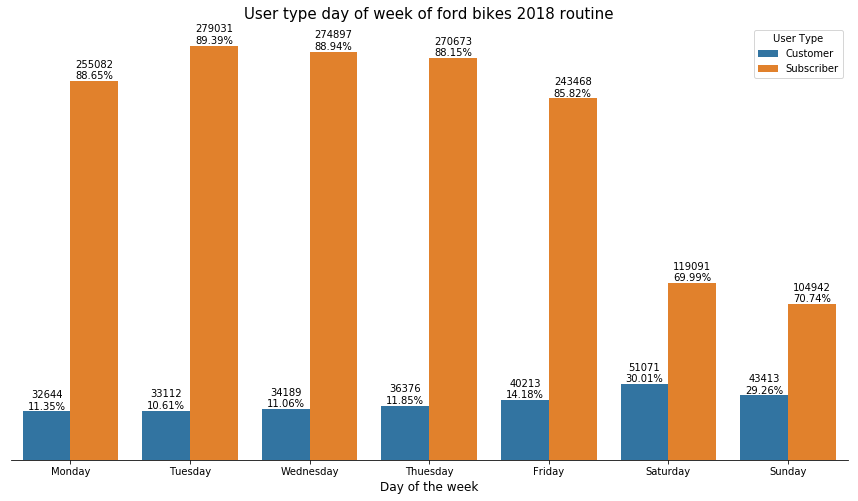

In [76]:
fig = plt.figure(figsize = [15, 8])

# Making empty list
perc_list = []
perc_cust_list = []
perc_subs_list = []

# Value counts days and user_type
user_type_list = go_bikes.groupby(['day', 'user_type']).size().sort_index().to_list()
day_list = go_bikes.day.value_counts().sort_index().to_list()

# Operation start for building the percentage
for i in range(0, len(day_list)):
    customer_perc = round(100 * user_type_list[2*i]/day_list[i], 2)
    perc_cust_list.append(customer_perc)
for j in range(0, len(day_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*j+1]/day_list[j], 2)
    perc_subs_list.append(subscriber_perc)

perc_list = perc_cust_list + perc_subs_list

# plotting the graph
ax = sb.countplot(data = go_bikes, x = 'day', hue = 'user_type');
plt.xlabel('Day of the week', fontsize = 12)
plt.legend(loc = 'upper right', title = 'User Type')
plt.title('User type day of week of ford bikes 2018 routine', fontsize = 15)

# Calling annotation function
annotation_perc(ax, perc_list)

# Calling removing axis function
remove_axis()

> **`Days`** routing of the **membership and non-membership** user in 2018. It seems more travelling in **business day**

### 5.2 `Duration sec with user_type and days:`
> Remember our the `univariant model` we took log tranformation that we know our data lie in certain ranges and the ford bikes company to allow each member rides 3600 sec and non-member 1800 sec after they will going to be charge. From that prior knowledge, we take obersevation that less than 3600 sec that allow.

In [77]:
sample1 = go_bikes.query("duration_sec <= 3600")

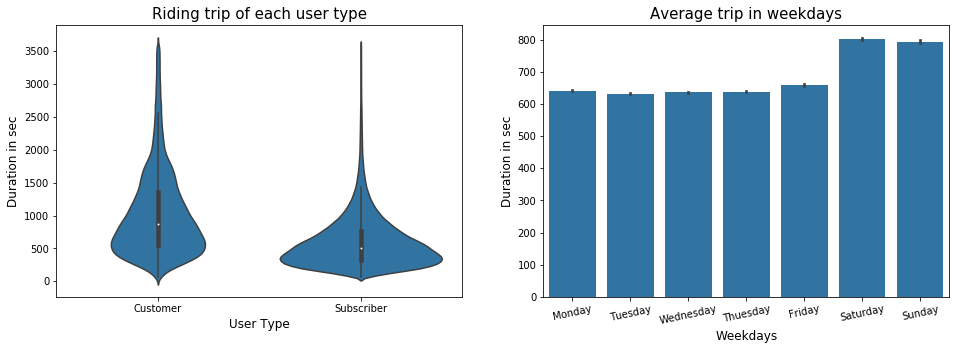

In [78]:
# This code will take some time because of huge records
fig = plt.figure(figsize = [16, 5])
plt.subplot(1,2,1)
sb.violinplot(data = sample1, x = 'user_type', y = 'duration_sec', color = base_color);
plt.xlabel('User Type', fontsize = 12)
plt.ylabel('Duration in sec', fontsize = 12)
plt.title('Riding trip of each user type', fontsize = 15);

plt.subplot(1,2,2)
sb.barplot(data= sample1, x = 'day', y = 'duration_sec', color = base_color)
plt.xticks(rotation = 12)
plt.xlabel('Weekdays', fontsize = 12)
plt.ylabel('Duration in sec', fontsize = 12);
plt.title('Average trip in weekdays', fontsize = 15);

> Non-membership as customer they have higher median than membership people. So, non-membership people genreally spend of their permitted timing while subscriber they spend less. It may be monthly membership price is less than non-membership.Thus, membership people used to riding for even short duration while non-membership people use only for just long distant and weekends.  

> Also, barplot show the mean duration time of weekends is higher than busniess days. So we predict people may drive in higher out on the busniess day but in shorter distance than weekends

###### Here we are taking the sample the rows between `300 to 1000 sec` that lie data at most in our log distribution

### 5.3 `Hour with user type`

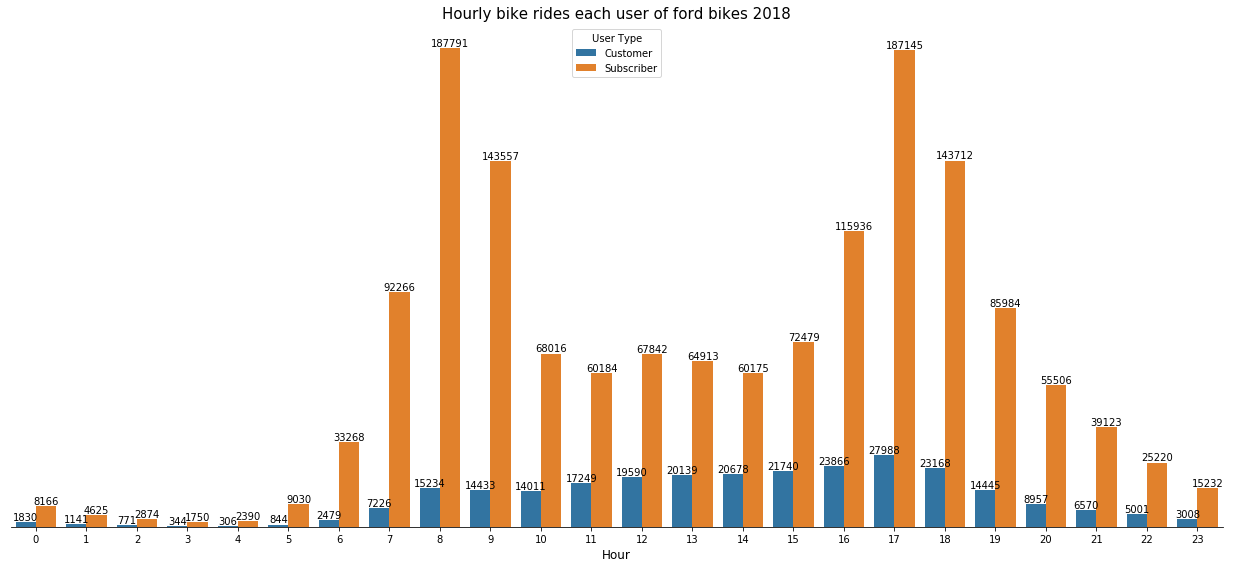

In [79]:
fig = plt.figure(figsize = [18, 8])

# Making empty list
perc_list = []
perc_cust_list = []
perc_subs_list = []

# Value counts days and user_type
user_type_list = go_bikes.groupby(['hour', 'user_type']).size().sort_index().to_list()
hour_list = go_bikes.hour.value_counts().sort_index().to_list()

# Operation start for building the percentage
for i in range(0, len(hour_list)):
    customer_perc = round(100 * user_type_list[2*i]/hour_list[i], 2)
    perc_cust_list.append(customer_perc)
for j in range(0, len(hour_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*j+1]/hour_list[j], 2)
    perc_subs_list.append(subscriber_perc)

perc_list = perc_cust_list + perc_subs_list

# plotting the graph
ax = sb.countplot(data = go_bikes, x = 'hour', hue = 'user_type');
plt.xlabel('Hour', fontsize = 12)
plt.legend(loc = 'upper center', title = 'User Type')
plt.title('Hourly bike rides each user of ford bikes 2018', fontsize = 15)
plt.tight_layout()

# Calling function annotation
annotation(ax)

# Calling removing axis function
remove_axis()

> Here are two timestamp people would like bike ride. First, In morning, hourly bike trip at **`8'O and 9'O clock`** at the morning both group people seems to be higher than morning timestamp. However, In the evening, non-membership people rides more than morning non-membership people at **`16 and 17'O clock.`**

### 5.4 `Month with user type`

In [80]:
# df['m'] = pd.Categorical(df['m'], ["March", "April", "Dec"])
go_bikes['month'] = pd.Categorical(go_bikes['month'], ['January','February','March','April','May','June','July', 'August', 'September', 'October', 'November', 'December'])
go_bikes.sort_values('month')

c:\users\fubuki\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,hour,start_city,end_city
711201,433,2018-01-10 07:30:33.091,2018-01-10 07:37:46.296,266,Parker St at Fulton St,37.862464,-122.264791,241,Ashby BART Station,37.852477,-122.270213,3291,Subscriber,False,January,Wednesday,7,Berkeley,Berkeley
700500,657,2018-01-12 19:23:57.346,2018-01-12 19:34:55.141,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,15,San Francisco Ferry Building (Harry Bridges Plaza),37.795392,-122.394203,1740,Subscriber,False,January,Friday,19,San Francisco,San Francisco
700499,402,2018-01-12 19:28:50.374,2018-01-12 19:35:32.478,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58,Market St at 10th St,37.776619,-122.417385,2347,Subscriber,False,January,Friday,19,San Francisco,San Francisco
700498,484,2018-01-12 19:28:49.306,2018-01-12 19:36:53.673,62,Victoria Manalo Draves Park,37.777791,-122.406432,58,Market St at 10th St,37.776619,-122.417385,2774,Subscriber,False,January,Friday,19,San Francisco,San Francisco
700497,189,2018-01-12 19:34:15.491,2018-01-12 19:37:25.132,122,19th St at Mission St,37.760299,-122.418892,98,Valencia St at 16th St,37.765052,-122.421866,3374,Subscriber,False,January,Friday,19,San Francisco,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552733,806,2018-12-18 20:48:37.206,2018-12-18 21:02:04.093,22,Howard St at Beale St,37.789756,-122.394643,81,Berry St at 4th St,37.775880,-122.393170,4658,Subscriber,False,December,Tuesday,20,San Francisco,San Francisco
552732,209,2018-12-18 20:58:35.000,2018-12-18 21:02:04.625,278,The Alameda at Bush St,37.331932,-121.904888,307,SAP Center,37.332692,-121.900084,3384,Subscriber,True,December,Tuesday,20,San Jose,San Jose
552731,854,2018-12-18 20:47:53.722,2018-12-18 21:02:08.180,197,El Embarcadero at Grand Ave,37.808848,-122.249680,159,24th St at Market St,37.816060,-122.278244,5311,Subscriber,True,December,Tuesday,20,Oakland,Oakland
552744,448,2018-12-18 20:51:04.032,2018-12-18 20:58:32.865,141,Valencia St at Cesar Chavez St,37.747998,-122.420219,125,20th St at Bryant St,37.759200,-122.409851,4941,Subscriber,False,December,Tuesday,20,San Francisco,San Francisco


In [81]:
# Quick sanity check if any null
go_bikes.isnull().sum().any()

False

In [82]:
go_bikes.groupby(['month', 'user_type']).size().sort_index()

month      user_type 
January    Customer       12042
           Subscriber     81047
February   Customer       14524
           Subscriber     90359
March      Customer       15900
           Subscriber     93306
April      Customer       20714
           Subscriber    107994
May        Customer       28695
           Subscriber    147318
June       Customer       31465
           Subscriber    158695
July       Customer       32508
           Subscriber    159561
August     Customer       29289
           Subscriber    156348
September  Customer       29097
           Subscriber    152593
October    Customer       25361
           Subscriber    171420
November   Customer       14818
           Subscriber    116602
December   Customer       16605
           Subscriber    111941
dtype: int64

In [83]:
go_bikes.month.value_counts().sort_index()

January       93089
February     104883
March        109206
April        128708
May          176013
June         190160
July         192069
August       185637
September    181690
October      196781
November     131420
December     128546
Name: month, dtype: int64

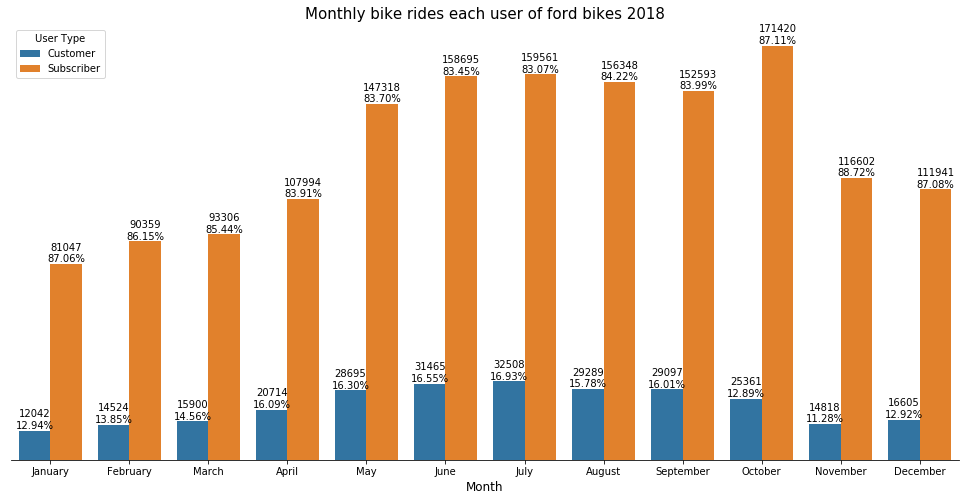

In [84]:
fig = plt.figure(figsize = [17, 8])

# Making empty list
perc_list = []
perc_cust_list = []
perc_subs_list = []

# Value counts days and user_type
user_type_list = go_bikes.groupby(['month', 'user_type']).size().sort_index().to_list()
month_list = go_bikes.month.value_counts().sort_index().to_list()

# Operation start for building the percentage
for i in range(0, len(month_list)):
    customer_perc = round(100 * user_type_list[2*i]/month_list[i], 2)
    perc_cust_list.append(customer_perc)
for j in range(0, len(month_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*j+1]/month_list[j], 2)
    perc_subs_list.append(subscriber_perc)

perc_list = perc_cust_list + perc_subs_list

# plotting the graph
ax = sb.countplot(data = go_bikes, x = 'month', hue = 'user_type');
plt.xlabel('Month', fontsize = 12)
plt.legend(loc = 'upper left', title = 'User Type')
plt.title('Monthly bike rides each user of ford bikes 2018', fontsize = 15)


# Calling function annotation
annotation_perc(ax, perc_list)

# Calling removing axis function
remove_axis()

>In the **`summer`** and **`fall`**, bike trips more than **`spring`**. People seems worked more in this period.

### 5.5 `Average Bike Trip`

In [85]:
sample2 = go_bikes.query("duration_sec >= 300 and duration_sec <= 1000")

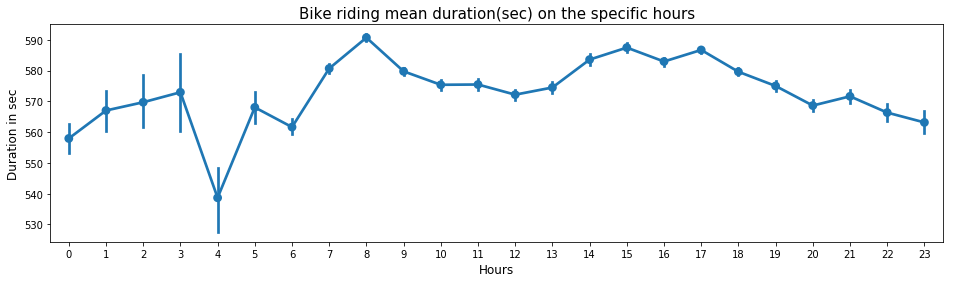

In [86]:
plt.figure(figsize = [16, 4])
sb.pointplot(data = sample2, x = 'hour', y = 'duration_sec');
plt.xlabel('Hours', fontsize = 12)
plt.ylabel('Duration in sec', fontsize = 12);
plt.title('Bike riding mean duration(sec) on the specific hours', fontsize = 15);

> Above pointplot portray interesting result, from the begining upto 4'O clock show some indication of the uncertainty around that estimate using error bars. Then, line astonshigly down pretty unclear. After 7'O clock pretty clear with very small error bar that we can deduce the result. The people go to the office at **17'O clock and they work untill 17'O clock** then return as you can see peak on that time. 

### 5.6 `Folium map different cities with user type`
> Our goal each distinct member travel to different city.

In [87]:
# map
city_map = folium.Map(location = [37.795392, -122.394203], zoom_start = 11, control_scale = True)

subscriber_city = diff_city[diff_city['user_type'] == 'Subscriber']
customer_city = diff_city[diff_city['user_type'] == 'Customer']

# plot city location using apply for subscriber
subscriber_city.apply(lambda row: folium.Marker(location = [row['start_station_latitude'], row['start_station_longitude']],
                                         popup = row['start_city'], 
                                         icon = folium.Icon(color = 'orange', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);

subscriber_city.apply(lambda row: folium.Marker(location = [row['end_station_latitude'], row['end_station_longitude']],
                                         popup = row['end_city'],
                                         icon = folium.Icon(color='green', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);


# plot city location using apply for customer
customer_city.apply(lambda row: folium.Marker(location = [row['start_station_latitude'], row['start_station_longitude']],
                                         popup = row['start_city'], 
                                         icon = folium.Icon(color = 'orange', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);

customer_city.apply(lambda row: folium.Marker(location = [row['end_station_latitude'], row['end_station_longitude']],
                                         popup = row['end_city'],
                                         icon = folium.Icon(color='green', icon = 'bicycle', prefix = 'fa')).add_to(city_map), axis=1);


# add route to map

subscriber_city.apply(lambda row: plugins.AntPath(locations=[[row['start_station_latitude'], row['start_station_longitude']], [row['end_station_latitude'], row['end_station_longitude']]], 
                color='#3e0cf2', weight = 1.5).add_to(city_map), axis = 1);


customer_city.apply(lambda row: plugins.AntPath(locations=[[row['start_station_latitude'], row['start_station_longitude']], [row['end_station_latitude'], row['end_station_longitude']]], 
                color='black', weight = 1.5).add_to(city_map), axis = 1);


# display the map
city_map



# city_map.save('citymap2')

> Above beautifully show black routes that `customer` and `subscriber` user type travel from one city to another. From prior result map of univariant model only source to destinatio places. Here custom little bit black route belongs to the `customer` whereas the `subscriber` belongs to the blue line. Here you see visually the one `customer` travel to the `San Jose` city which is very long distance than others. Also, if you look carefully you will find `black routes` little longer than `blue routes`. You can conjecture the customer duration time may be larger than subscriber.

> As you see above bar graph showing, in weekend, the people **`mean`** bike riding are drived longer than weekdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The main features are  **`duraiton_sec`, `day` and `user_type`**. Then those are vary with `hour`, `month`, `bike_sharing_all_trips`. We observe the relationship between days and duration time that although busniess days counts larger than the weekends for each user. But weekends average trip is longer than busniess days. Also, the rush hours are more during the morning at 8 to 9'O Clock and 18 to 17'O Clock. Furthermore, people are working and travelling more in fall and summer than spring in `Month`.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The one more intersting features is **`start_city`** and **`end_city`** with folium map that showing visually the **`subscriber` and `customer`** are dipicting how long travelling from one city to another. 

## 6. Multivariate Exploration

### 6.1 `Duraiton_sec vs day with user type`

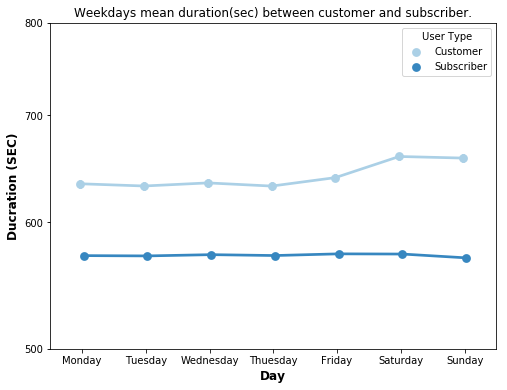

In [88]:
plt.figure(figsize=(8, 6))
ax = sb.pointplot(data = sample2, x = 'day', y = 'duration_sec', hue = 'user_type', dodge = True, palette = 'Blues')
plt.yscale('log')

# This get rid of all messy log lable 
ax.set_yticklabels([], minor = True);

# Set the new label search it plt.xticks on google
y_ticks = [500, 600, 700, 800]
plt.yticks(y_ticks, y_ticks);

# Set titles, labels, and axis
plt.legend(title = 'User Type', loc = 'best');
plt.xlabel('Day', fontsize = 12, fontweight = 'bold');
plt.ylabel('Ducration (SEC)', fontsize = 12, fontweight = 'bold');
plt.title('Weekdays mean duration(sec) between customer and subscriber.');

> Here you can see clearly the `customer` type users have higher average riding the long distance in each days whereas we saw the counts `customer` lower than `subscriber`.

### 6.2 `Bike Sharing in the metropolitan area`
> Bike sharing is a transportation system that allows community members to quickly and conveniently rent a bicycle for short-distance use.  With most bike sharing programs, people pick up a bike at a self-serve bike station and then return the bike to any bike station near their destination.

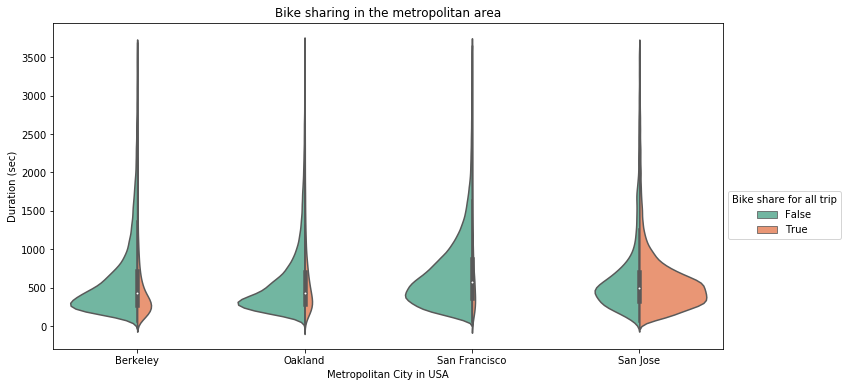

In [89]:
plt.figure(figsize = [12, 6])
sb.violinplot(data = sample1, x = 'start_city', y = 'duration_sec', hue = 'bike_share_for_all_trip', 
              palette = 'Set2', split = True, scale = 'count');
plt.xlabel('Metropolitan City in USA', fontweight = 12)
plt.ylabel('Duration (sec)', fontweight = 12);
plt.legend(loc = 'best', title = 'Bike share for all trip', bbox_to_anchor=(1.0, 0.5))
plt.title('Bike sharing in the metropolitan area', fontweight = 15);

> Above violine plot show the width at both side that indicate how many people are shared the bikes in the city area. We see only the **`San Jose`** city area shared the bike because of it may be low number of station avaliable that cause people get difficulties to getting bike from station. In order to avoid this problem, they start sharing.  

### 6.3 `Metropolitan cities Vs month, day and hour`

In [90]:
df_san_frans = go_bikes.query("start_city == 'San Francisco'")
df_oakland = go_bikes.query("start_city == 'Oakland'")
df_berkeley = go_bikes.query("start_city == 'Berkeley'")
df_san_jose = go_bikes.query("start_city == 'San Jose'")

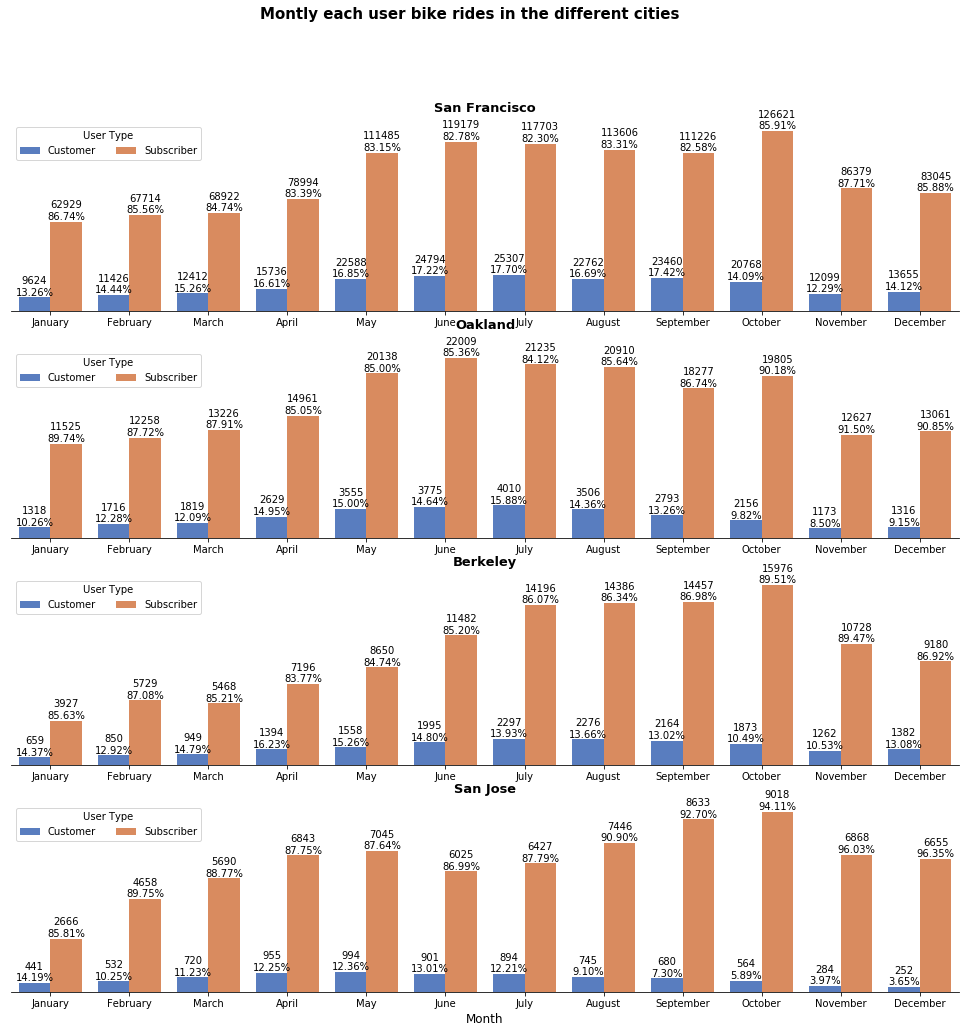

In [92]:
fig = plt.figure(figsize = [17, 16])

plt.subplot(4,1,1)
# Making empty list
perc_list_1 = []
perc_cust_list_1 = []
perc_subs_list_1 = []

# Value counts days and user_type
user_type_list = df_san_frans.groupby(['month', 'user_type']).size().sort_index().to_list()
month_list = df_san_frans.month.value_counts().sort_index().to_list()

# Operation start for building the percentage
for i in range(0, len(month_list)):
    customer_perc = round(100 * user_type_list[2*i]/month_list[i], 2)
    perc_cust_list_1.append(customer_perc)
for j in range(0, len(month_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*j+1]/month_list[j], 2)
    perc_subs_list_1.append(subscriber_perc)

perc_list_1 = perc_cust_list_1 + perc_subs_list_1

# plotting the graph
ax1 = sb.countplot(data = df_san_frans, x = 'month', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('San Francisco', fontsize =13, pad = 10.5, fontweight = 'bold')
plt.suptitle('Montly each user bike rides in the different cities', fontsize = 15, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax1, perc_list_1)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,2)
# Making empty list
perc_list_2 = []
perc_cust_list_2 = []
perc_subs_list_2 = []

# Value counts days and user_type
user_type_list = df_oakland.groupby(['month', 'user_type']).size().sort_index().to_list()
month_list = df_oakland.month.value_counts().sort_index().to_list()

# Operation start for building the percentage
for k in range(0, len(month_list)):
    customer_perc = round(100 * user_type_list[2*k]/month_list[k], 2)
    perc_cust_list_2.append(customer_perc)
for l in range(0, len(month_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*l+1]/month_list[l], 2)
    perc_subs_list_2.append(subscriber_perc)

perc_list_2 = perc_cust_list_2 + perc_subs_list_2

# plotting the graph
ax2 = sb.countplot(data = df_oakland, x = 'month', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('Oakland', fontsize =13, pad = 20, fontweight = 'bold')

# Calling function annotation
annotation_perc(ax2, perc_list_2)

# Calling removing axis function
remove_axis()

########################################################################################################################

plt.subplot(4,1,3)
# Making empty list
perc_list_3 = []
perc_cust_list_3 = []
perc_subs_list_3 = []

# Value counts days and user_type
user_type_list = df_berkeley.groupby(['month', 'user_type']).size().sort_index().to_list()
month_list = df_berkeley.month.value_counts().sort_index().to_list()

# Operation start for building the percentage
for m in range(0, len(month_list)):
    customer_perc = round(100 * user_type_list[2*m]/month_list[m], 2)
    perc_cust_list_3.append(customer_perc)
for n in range(0, len(month_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*n+1]/month_list[n], 2)
    perc_subs_list_3.append(subscriber_perc)

perc_list_3 = perc_cust_list_3 + perc_subs_list_3

# plotting the graph
ax3 = sb.countplot(data = df_berkeley, x = 'month', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('Berkeley', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax3, perc_list_3)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,4)
# Making empty list
perc_list_4 = []
perc_cust_list_4 = []
perc_subs_list_4 = []

# Value counts days and user_type
user_type_list = df_san_jose.groupby(['month', 'user_type']).size().sort_index().to_list()
month_list = df_san_jose.month.value_counts().sort_index().to_list()

# Operation start for building the percentage
for o in range(0, len(month_list)):
    customer_perc = round(100 * user_type_list[2*o]/month_list[o], 2)
    perc_cust_list_4.append(customer_perc)
for p in range(0, len(month_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*p+1]/month_list[p], 2)
    perc_subs_list_4.append(subscriber_perc)

perc_list_4 = perc_cust_list_4 + perc_subs_list_4

# plotting the graph
ax4 = sb.countplot(data = df_san_jose, x = 'month', hue = 'user_type', palette = 'muted');
plt.xlabel('Month', fontsize = 12)
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('San Jose', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax4, perc_list_4)

# Calling removing axis function
remove_axis()

> By Monthly, people would like tranvel in `Fall` and `Summer`. It may be in the fall people are worked more whereas In the summmer, people are gone to the other and enjoying the vacation in each cities.

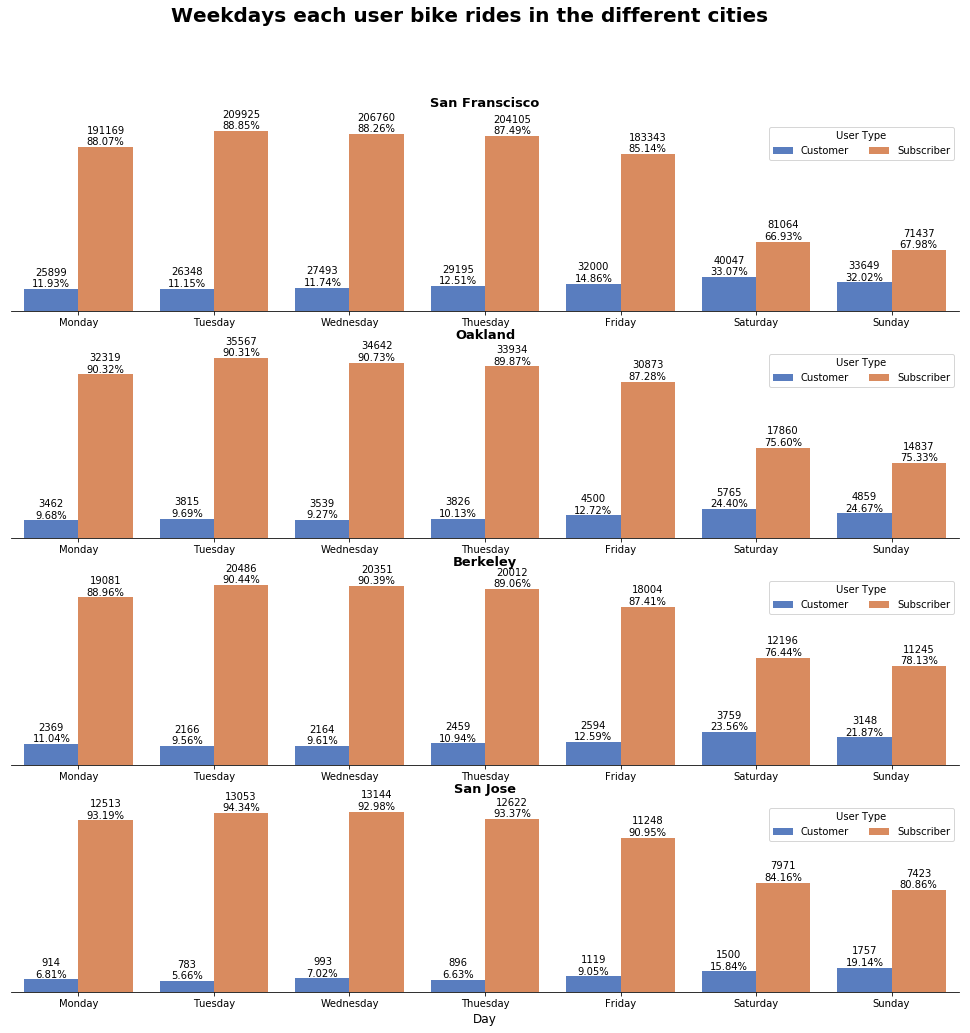

In [95]:
fig = plt.figure(figsize = [17, 16])

plt.subplot(4,1,1)
# Making empty list
perc_list_1 = []
perc_cust_list_1 = []
perc_subs_list_1 = []

# Value counts days and user_type
user_type_list = df_san_frans.groupby(['day', 'user_type']).size().sort_index().to_list()
day_list = df_san_frans.day.value_counts().sort_index().to_list()

# Operation start for building the percentage
for i in range(0, len(day_list)):
    customer_perc = round(100 * user_type_list[2*i]/day_list[i], 2)
    perc_cust_list_1.append(customer_perc)
for j in range(0, len(day_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*j+1]/day_list[j], 2)
    perc_subs_list_1.append(subscriber_perc)

perc_list_1 = perc_cust_list_1 + perc_subs_list_1

# plotting the graph
ax1 = sb.countplot(data = df_san_frans, x = 'day', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper right', ncol = 2, title = 'User Type')
plt.title('San Franscisco', fontsize =13, pad = 15, fontweight = 'bold')
plt.suptitle('Weekdays each user bike rides in the different cities', fontsize = 20, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax1, perc_list_1)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,2)
# Making empty list
perc_list_2 = []
perc_cust_list_2 = []
perc_subs_list_2 = []

# Value counts days and user_type
user_type_list = df_oakland.groupby(['day', 'user_type']).size().sort_index().to_list()
day_list = df_oakland.day.value_counts().sort_index().to_list()

# Operation start for building the percentage
for k in range(0, len(day_list)):
    customer_perc = round(100 * user_type_list[2*k]/day_list[k], 2)
    perc_cust_list_2.append(customer_perc)
for l in range(0, len(day_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*l+1]/day_list[l], 2)
    perc_subs_list_2.append(subscriber_perc)

perc_list_2 = perc_cust_list_2 + perc_subs_list_2

# plotting the graph
ax2 = sb.countplot(data = df_oakland, x = 'day', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper right', ncol = 2, title = 'User Type')
plt.title('Oakland', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax2, perc_list_2)

# Calling removing axis function
remove_axis()

########################################################################################################################

plt.subplot(4,1,3)
# Making empty list
perc_list_3 = []
perc_cust_list_3 = []
perc_subs_list_3 = []

# Value counts days and user_type
user_type_list = df_berkeley.groupby(['day', 'user_type']).size().sort_index().to_list()
day_list = df_berkeley.day.value_counts().sort_index().to_list()

# Operation start for building the percentage
for m in range(0, len(day_list)):
    customer_perc = round(100 * user_type_list[2*m]/day_list[m], 2)
    perc_cust_list_3.append(customer_perc)
for n in range(0, len(day_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*n+1]/day_list[n], 2)
    perc_subs_list_3.append(subscriber_perc)

perc_list_3 = perc_cust_list_3 + perc_subs_list_3

# plotting the graph
ax3 = sb.countplot(data = df_berkeley, x = 'day', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper right', ncol = 2, title = 'User Type')
plt.title('Berkeley', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax3, perc_list_3)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,4)
# Making empty list
perc_list_4 = []
perc_cust_list_4 = []
perc_subs_list_4 = []

# Value counts days and user_type
user_type_list = df_san_jose.groupby(['day', 'user_type']).size().sort_index().to_list()
day_list = df_san_jose.day.value_counts().sort_index().to_list()

# Operation start for building the percentage
for o in range(0, len(day_list)):
    customer_perc = round(100 * user_type_list[2*o]/day_list[o], 2)
    perc_cust_list_4.append(customer_perc)
for p in range(0, len(day_list)):
     # print(user_type_list[2*j+1])
    subscriber_perc = round(100 * user_type_list[2*p+1]/day_list[p], 2)
    perc_subs_list_4.append(subscriber_perc)

perc_list_4 = perc_cust_list_4 + perc_subs_list_4

# plotting the graph
ax4 = sb.countplot(data = df_san_jose, x = 'day', hue = 'user_type', palette = 'muted');
plt.xlabel('Day', fontsize = 12)
plt.legend(loc = 'upper right', ncol = 2, title = 'User Type')
plt.title('San Jose', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annotation_perc(ax4, perc_list_4)

# Calling removing axis function
remove_axis()

> Working day, `Subscriber` people at most travelling in each cities than `Customer`. Also, `customer` are less count and percentage in each city than others on busniess days. Also, `San Jose` has few counts than other i, e less bike riding use in thise cities because there may be very less station avaliable. 

In [98]:
def annot_less(ax):
    i = 0
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                   (p.get_x()+p.get_width()/2, p.get_height()),
                   color = 'black', va='bottom', ha='center', size=8)
        i+=1

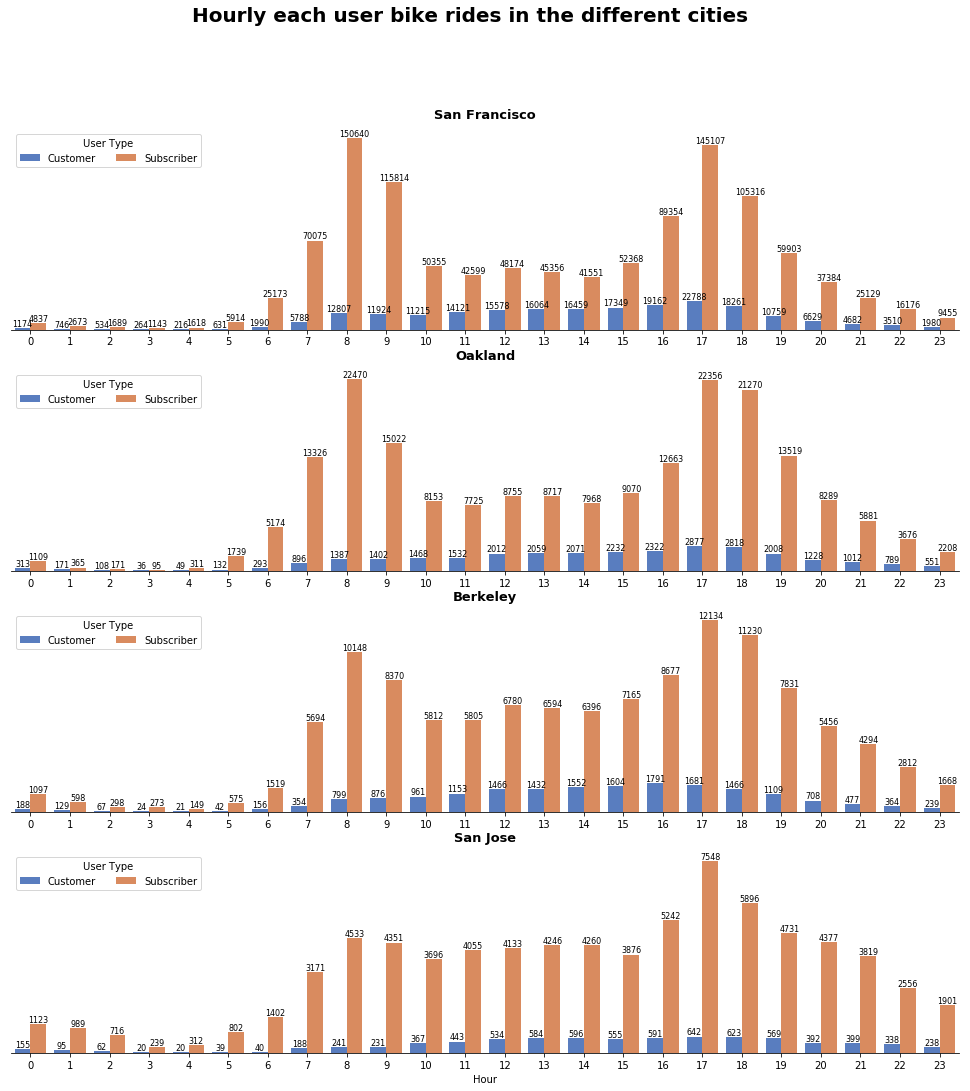

In [99]:
fig = plt.figure(figsize = [17, 17])

plt.subplot(4,1,1)

# Value counts days and user_type
user_type_list = df_san_frans.groupby(['hour', 'user_type']).size().sort_index().to_list()
hour_list = df_san_frans.hour.value_counts().sort_index().to_list()

# plotting the graph
ax1 = sb.countplot(data = df_san_frans, x = 'hour', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('San Francisco', fontsize =13, pad = 10.5, fontweight = 'bold')
plt.suptitle('Hourly each user bike rides in the different cities', fontsize = 20, fontweight = 'bold')



# Calling function annotation
annot_less(ax1)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,2)

# Value counts days and user_type
user_type_list = df_oakland.groupby(['hour', 'user_type']).size().sort_index().to_list()
hour_list = df_oakland.hour.value_counts().sort_index().to_list()

# plotting the graph
ax2 = sb.countplot(data = df_oakland, x = 'hour', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('Oakland', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annot_less(ax2)

# Calling removing axis function
remove_axis()

########################################################################################################################

plt.subplot(4,1,3)

# Value counts days and user_type
user_type_list = df_berkeley.groupby(['hour', 'user_type']).size().sort_index().to_list()
hour_list = df_berkeley.hour.value_counts().sort_index().to_list()


# plotting the graph
ax3 = sb.countplot(data = df_berkeley, x = 'hour', hue = 'user_type', palette = 'muted');
plt.xlabel('')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('Berkeley', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annot_less(ax3)

# Calling removing axis function
remove_axis()

###########################################################################################################################

plt.subplot(4,1,4)

# Value counts days and user_type
user_type_list = df_san_jose.groupby(['hour', 'user_type']).size().sort_index().to_list()
hour_list = df_san_jose.hour.value_counts().sort_index().to_list()


# plotting the graph
ax4 = sb.countplot(data = df_san_jose, x = 'hour', hue = 'user_type', palette = 'muted');
plt.xlabel('Hour')
plt.legend(loc = 'upper left', ncol = 2, title = 'User Type')
plt.title('San Jose', fontsize =13, pad = 10.5, fontweight = 'bold')


# Calling function annotation
annot_less(ax4)

# Calling removing axis function
remove_axis()

> Above the result pretty identical pattern in each city. Bike rush hour start from 7'O clock in each cities. Then, go upward graudally, afterwards increase on 17'O Clock returning hour from work in each cities.

### 6.4 `Metropolitan area vs Duration_sec, Bike Sharing with each user`

<Figure size 1008x432 with 0 Axes>

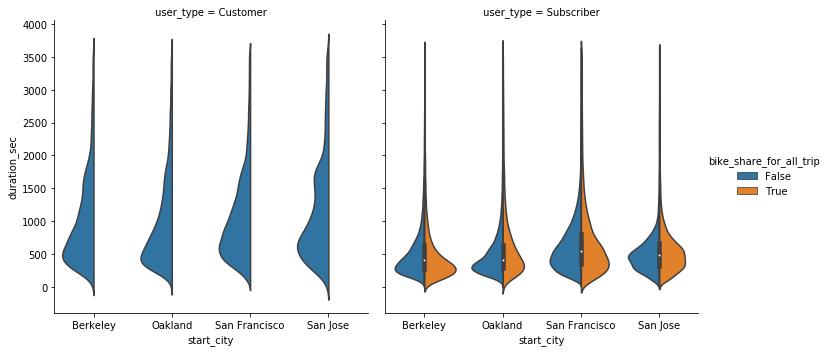

In [100]:
plt.figure(figsize=[14,6]);
sb.catplot(x="start_city", y="duration_sec",
                hue="bike_share_for_all_trip", col="user_type",
                data=sample1, kind="violin", split=True);

> We saw the earlier, result of the Oakland has highest width of bike sharing. Here we are comparing the user type which `customer` seems to be not interested in sharing the bikes may be they just go for the long trip for enjoying. However, `Subscriber` we have been seen short duration and most of they worked on non weekends days. So they share the bikes for the office work or shop work in the town. 

### 6.5 `Hour vs day count with heatmap of each user` 

In [134]:
# Making appropriate table
customer_count = go_bikes.query("user_type == 'Customer'").groupby(['hour', 'day']).size()
subscriber_count = go_bikes.query("user_type == 'Subscriber'").groupby(['hour', 'day']).size()

In [135]:
customer_count = customer_count.reset_index(name = 'count')
subscriber_count = subscriber_count.reset_index(name = 'count')

In [136]:
customer_count = customer_count.pivot(index = 'hour', columns = 'day', values = 'count')
subscriber_count = subscriber_count.pivot(index = 'hour', columns = 'day', values = 'count')

In [137]:
customer_count.sort_index(level=0, ascending=True, inplace=True)

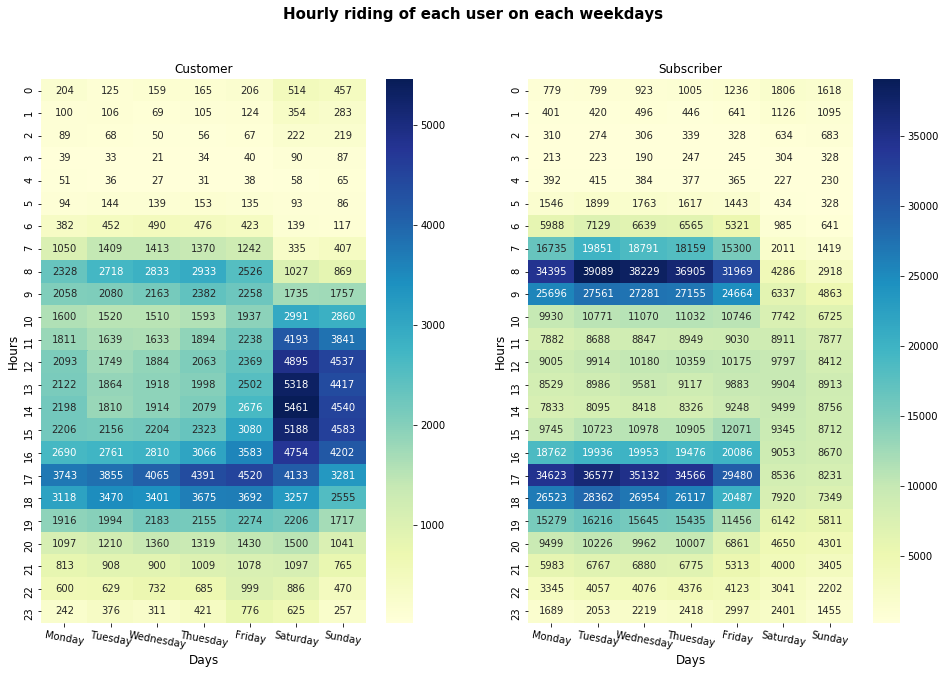

In [138]:
plt.figure(figsize = [16, 10])
plt.subplot(1,2,1)
sb.heatmap(customer_count, annot = True, fmt = 'd', cmap="YlGnBu");
plt.xticks(rotation = 350)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Hours', fontsize = 12)
plt.title('Customer');

plt.subplot(1,2,2)
sb.heatmap(subscriber_count, annot = True, fmt = 'd', cmap="YlGnBu");
plt.xticks(rotation = 350)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Hours', fontsize = 12)
plt.title('Subscriber')
plt.suptitle('Hourly riding of each user on each weekdays', fontsize = 15, fontweight = 'bold');

> `Non-membership` as customer people are riding on weekends between 10'O clock to 16'O clock. They may go to the free trip or may go to the restaurent, releatives, and picnic spot for enjoying. On the other hand, `Subscriber` rush hour on the working day ranges between 7 to 9'O clock at the morning and 16 to 18'O clock for return from office.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> **`hour`**, **`day`**, **`duration_sec`**, **`user_type`**, and **`bike_sharing_trip`** counts are closely reletated to each other. 
1.  **`day`**, **`duration_sec`**, and **`user_type`**. Although in countplot counts are higher than in busniess day of `subscriber`, In pointplot, `customer` mean time of duration higher than `subscriber`. Also, in weekends people take longer trip than working days of weekdays. 
2. **`cities`** and **`bike_share`** using split properties of violinplot depict how much people are sharing the bikes in different cities.
3. **`cities`** VS **`month`**, **`day`**, **`hour`**. Those portray the trend, in month, hour, and day as we have already discussed above.  
4. **`Metropolitan area vs Duration_sec, Bike Sharing with each user`**. This delineate surprising story as explain below.  
5. **` Hour vs day count with heatmap of each user`** wonderful color pattern that indicate nice trends and provide evidence that we have benn predicted since bivariant model.

### Were there any interesting or surprising interactions between features?
> Another interesting or astonished interaction between with **`start_city`** and **`user_type`** where we found **`San Jose`** city has only `sharing the bikes`. Also, further exploration reveals that Non-membership as customer are unlikely sharing bikes with other while **`Subscriber`** does share their bike.

### Final Summary of Findings: 
> San Fransciso has highest to used go bikes among the cities. But we saw the result of bike sharing pretty low due to more station avaliable. So people don't need to bother for pickup the bikes. Also, bizzare result only `subscriber` has been type sharing the bikes bacause of it may office, shop and busniess related work happen that we saw in `weekdays` result.

> We saw the rush hours at 8 to 9'O clock in the morning and  at 16 to 17'O clock in the evening those timing insinuate busniess and office hour tranvelling. Also, In the weekends, Customer average `duration` time surprisingly higher than subscriber in each days. Moreover, busniess days average trip timing less than weekends that we can predict people love to go long dive, picnic, and meet relatives.